### imports

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Visualize store visits

## 2.a Using a tool of your choice, visualize the trend of unique visits for all places

In [2]:
# open final_df
final_df = pd.read_csv("../out_data/analysis.csv")

In [9]:
# final_df.head()

In [4]:
# transform column "date" into datetime object
final_df["date"] = pd.to_datetime(final_df["date"])

In [5]:
type(final_df["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

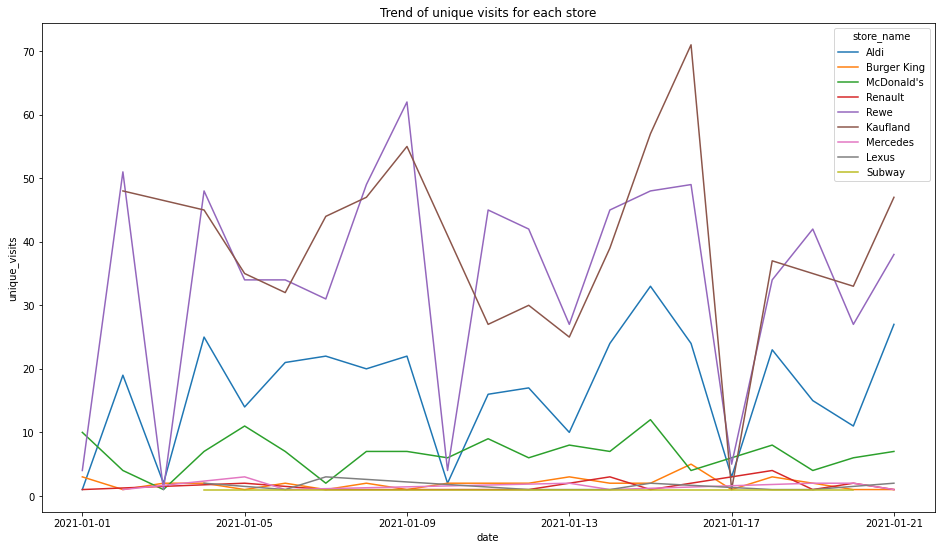

In [47]:
plt.figure(figsize=(16,9))

sns_plot = sns.lineplot(data=final_df,
                        x="date",
                        y="unique_visits",
                        hue="store_name",
                        estimator="sum", # the default is "mean"
                        ci=None) # disable confidence intervals

plt.title("Trend of unique visits for each store");

Visualizing the unique visits for each store id caused a huge mess on the plot as there are 186 unique store ids, for this reason, I decided to plot the trend for each store name.

In [7]:
# save the plot
sns_plot.figure.savefig("../out_data/trend_of_unique_visits.png")

## 2.b Is there any anomaly? Add a comment about your observation

Based on the sample data (smaller dataset): \
There is a significant drop in the number of unique visits on the 17th of January by Kaufland, Rewe, and Aldi. All grocery sotres must have been closed that day, as it was Sunday. There were, however, no such huge drops by Kaufland one and two weaks before.

### Try to create a function for visualizing unique visits by store

In [35]:
final_df.head()

,date,store_name,store_id,total_signals,unique_visits,device_id,lat,lon,addidas,apple,...,high_income,honda,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,2021-01-01,Aldi,place_64,1,1,35745,52.541398,13.436914,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2021-01-01,Burger King,place_42,4,1,40894,52.422292,13.311893,0,0,...,1,0,0,0,1,0,0,0,1,0
2,2021-01-01,Burger King,place_43,1,1,8753,52.527226,13.232200,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2021-01-01,Burger King,place_50,1,1,47558,52.408845,13.370406,0,0,...,0,1,0,0,1,0,1,0,0,0
4,2021-01-01,McDonald's,place_17,1,1,23806,52.504506,13.623608,0,0,...,0,0,0,0,1,0,1,0,0,0


In [32]:
final_df["store_name"].unique()

array(['Aldi', 'Burger King', "McDonald's", 'Renault', 'Rewe', 'Kaufland',
       'Mercedes', 'Lexus', 'Subway'], dtype=object)

In [48]:
def plot_store(name):
    s_name = name
    df = final_df.loc[final_df["store_name"] == s_name]
    plt.figure(figsize=(16,9))
    sns_plot = sns.lineplot(data=df,
                        x="date",
                        y="unique_visits",
                        estimator="sum",
                        hue=None,
                        ci=None)
    plt.title(f"Trend of unique visits for {s_name}")
    plt.show()

In [49]:
rewe_one_day = final_df.loc[(final_df["store_name"] == "Rewe") & (final_df["date"] == "2021-01-09")]
rewe_one_day["total_signals"].sum()

86

In [50]:
rewe_one_day["unique_visits"].sum()

62

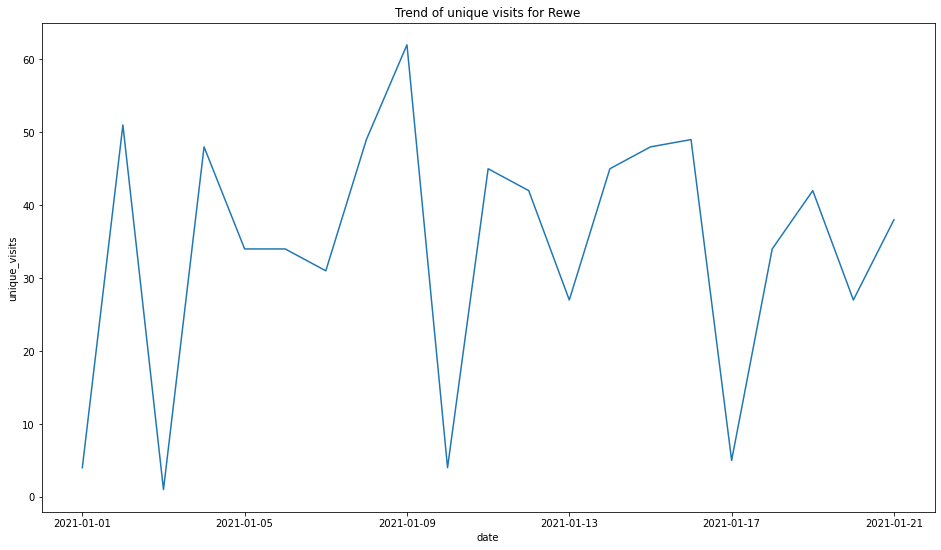

In [51]:
plot_store("Rewe")

Something is wrong with the number of unique visitors on the "y" axes.